<a href="https://colab.research.google.com/github/akshitamadan/Projects/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data sets/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [58]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [59]:
df.shape

(4238, 16)

In [60]:
# df = df.drop(['BMI','heartRate'],axis=1)

In [61]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [62]:
df = df[df['heartRate'].notna()]

In [63]:
df.shape

(4237, 16)

In [64]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

In [65]:
# Check the % of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

male               0.00
age                0.00
education          2.48
currentSmoker      0.00
cigsPerDay         0.68
BPMeds             1.25
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.18
sysBP              0.00
diaBP              0.00
BMI                0.45
heartRate          0.00
glucose            9.16
TenYearCHD         0.00
dtype: float64

In [66]:
df = df.dropna()

In [67]:
df.shape

(3656, 16)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [69]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


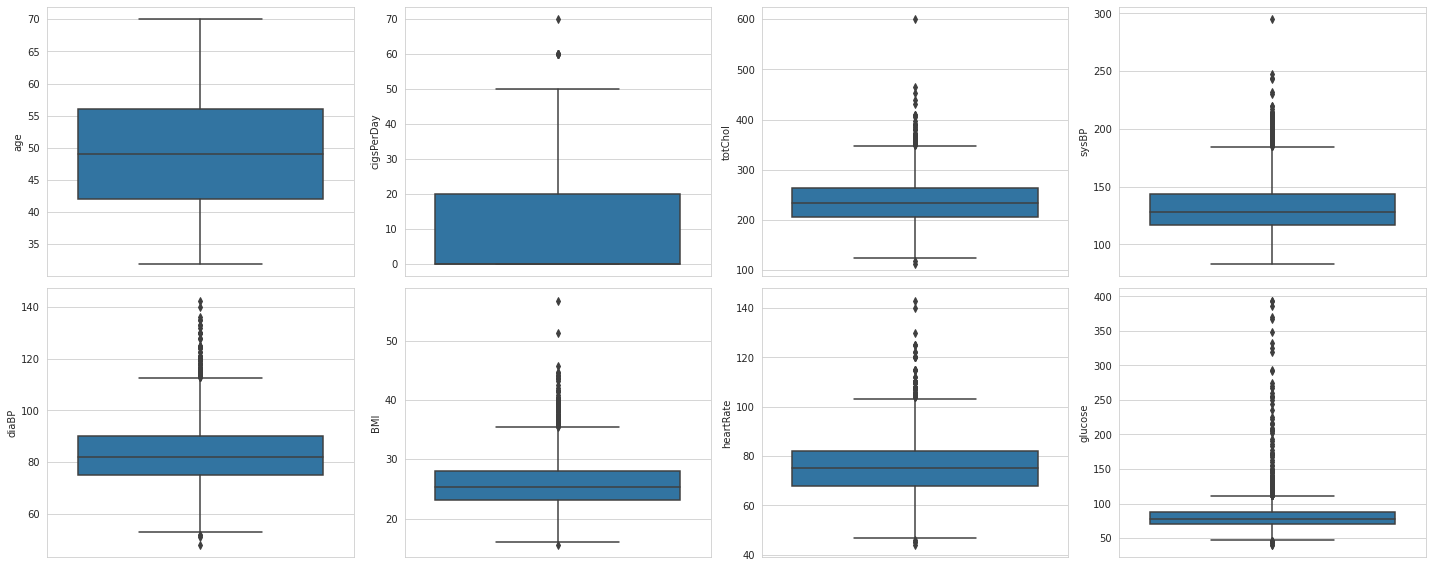

In [70]:
# Box plots to see data distribution after outlier treatment
sns.set_style("whitegrid")
fig, axs = plt.subplots(2,4, figsize = (20,8))

plt2 = sns.boxplot(y = df['age'], ax = axs[0,0])
plt3 = sns.boxplot(y = df['cigsPerDay'], ax = axs[0,1])
plt4 = sns.boxplot(y = df['totChol'], ax = axs[0,2])
plt4 = sns.boxplot(y = df['sysBP'], ax = axs[0,3])
plt2 = sns.boxplot(y = df['diaBP'], ax = axs[1,0])
plt3 = sns.boxplot(y = df['BMI'], ax = axs[1,1])
plt4 = sns.boxplot(y = df['heartRate'], ax = axs[1,2])
plt4 = sns.boxplot(y = df['glucose'], ax = axs[1,3])

plt.tight_layout()

In [71]:
df = df.drop(labels = 'currentSmoker',axis = 1)

In [72]:
X_train, X_test = train_test_split(df, test_size=0.3, stratify=df.TenYearCHD, random_state=25)
X_train.shape

(2559, 15)

In [73]:
X_test.shape

(1097, 15)

In [74]:
y_train = X_train['TenYearCHD']
y_test = X_test['TenYearCHD']
X_train = X_train.drop(labels = 'TenYearCHD', axis = 1)
X_test = X_test.drop(labels = 'TenYearCHD', axis = 1)

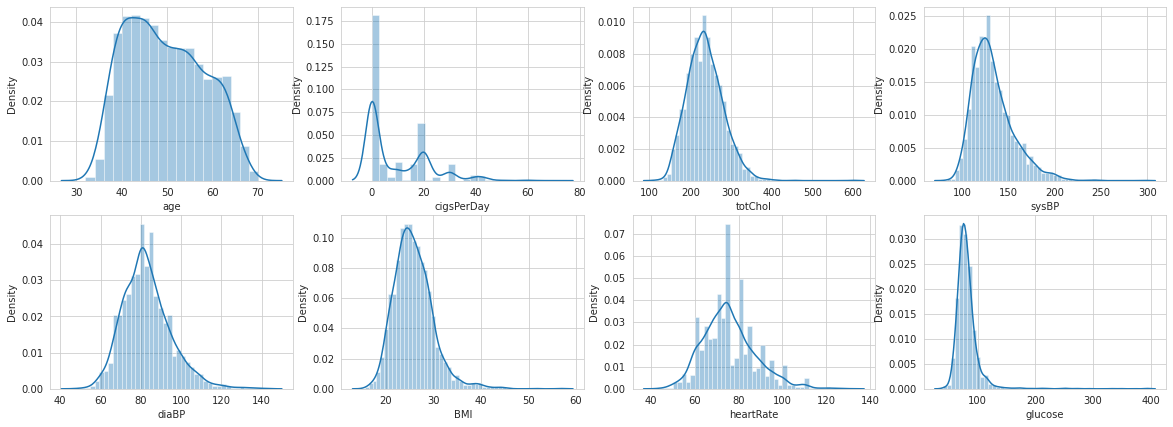

In [75]:
# plot the histogram of a variable from the dataset to see the skewness
var = 'age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'

plt.figure(figsize=(20,30))
i=0
for col in var:
    i += 1
    plt.subplot(8,4, i)
    sns.distplot(X_train[col])

plt.show()

In [76]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
Skewness,0.216306,0.23527,0.719778,1.2143,5.427595,12.953864,0.828629,5.986753,0.637345,1.166465,0.755398,1.098622,0.626965,6.219994


In [77]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['cigsPerDay', 'BPMeds', 'prevalentStroke', 'diabetes', 'sysBP', 'BMI',
       'glucose'],
      dtype='object', name='Features')


In [78]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

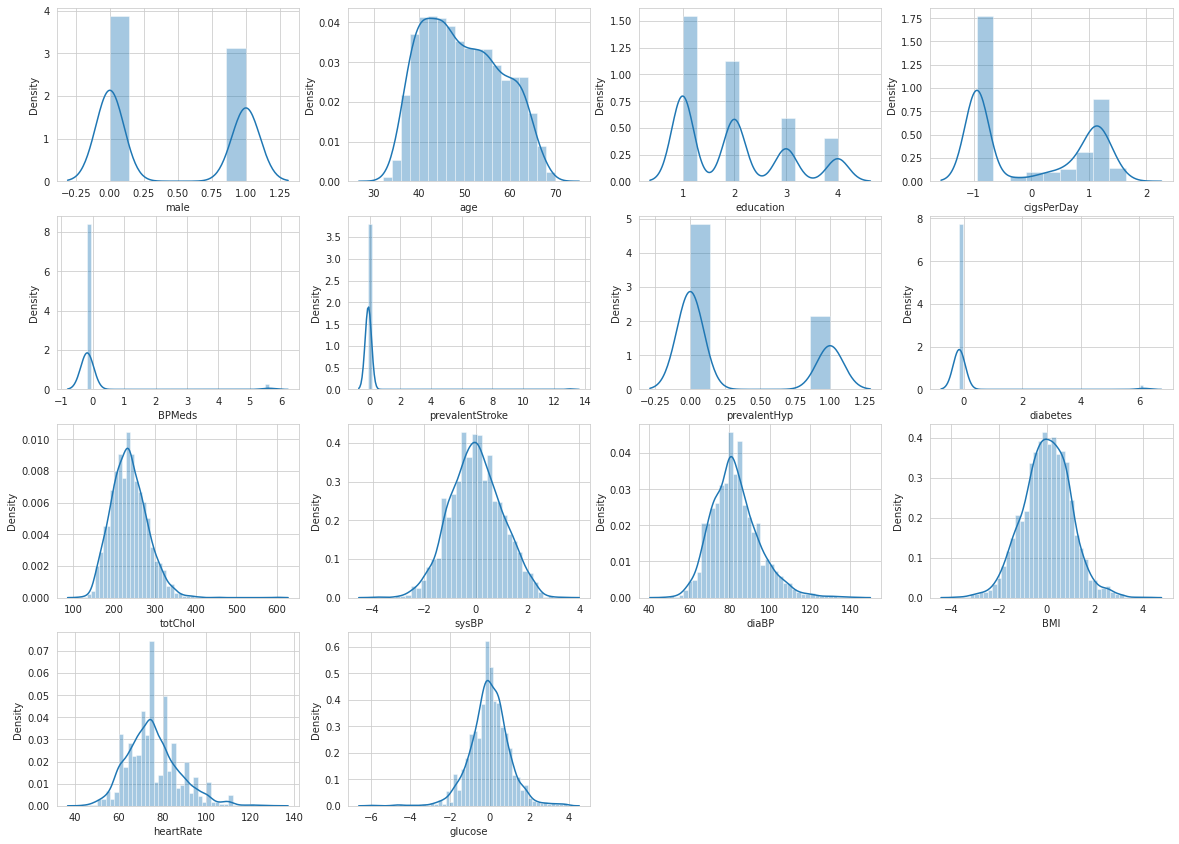

In [79]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,30))
i=0
for col in var:
    i += 1
    plt.subplot(8,4, i)
    sns.distplot(X_train[col])

plt.show()

In [80]:
df.value_counts('TenYearCHD')

TenYearCHD
0    3099
1     557
dtype: int64

In [81]:
scaler = StandardScaler()
cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2520,1.113915,0.293698,2.012031,-0.943778,-0.178479,-0.076787,-0.668266,-0.162709,-0.295981,-0.039876,-0.073365,-0.367734,-0.467530,-0.850851
1068,1.113915,0.411315,-0.949311,0.808732,-0.178479,-0.076787,1.496409,6.145952,-0.182193,0.794381,-0.073365,0.606595,-1.310367,2.853552
2736,1.113915,0.646550,-0.949311,0.184643,-0.178479,-0.076787,1.496409,-0.162709,-0.591828,0.614577,-0.031636,-1.757113,1.218146,-0.657154
2945,-0.897735,0.764167,1.024917,-0.943778,-0.178479,-0.076787,1.496409,-0.162709,1.137741,0.943776,0.928148,0.181877,-0.046111,1.182107
4114,-0.897735,1.822721,2.012031,-0.943778,-0.178479,-0.076787,-0.668266,-0.162709,0.978438,-0.815982,-0.824500,-1.776719,-0.888948,-2.049911


In [82]:
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1954,-0.897735,0.176081,1.024917,-0.943778,-0.178479,-0.076787,-0.668266,-0.162709,-0.478040,-0.039876,0.051824,-0.240614,-0.298962,-0.223785
1185,1.113915,-0.412005,-0.949311,-0.943778,-0.178479,-0.076787,-0.668266,-0.162709,-0.728373,-0.619237,-0.532392,-0.507715,-0.046111,-0.068219
4096,-0.897735,0.764167,-0.949311,-0.943778,-0.178479,-0.076787,1.496409,6.145952,0.819136,0.353219,-0.240284,0.590838,1.218146,3.219529
1163,1.113915,2.175573,-0.949311,-0.943778,-0.178479,-0.076787,-0.668266,-0.162709,0.045382,0.063667,-0.240284,-0.576464,-0.973232,1.003366
688,-0.897735,0.881784,0.037803,-0.943778,-0.178479,-0.076787,-0.668266,-0.162709,1.183256,-0.202421,-0.741041,-2.238094,-0.804665,-0.752411


In [83]:
#plot the correlation matrix of countries.
corr_df = df.copy()
corr_df.drop('TenYearCHD', axis = 1, inplace = True)
corr1 = corr_df.corr()
corr1
# corr_df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.024387,0.017677,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048
age,-0.024387,1.000000,-0.158961,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245
education,0.017677,-0.158961,1.000000,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874
cigsPerDay,0.331243,-0.189099,0.013527,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803
BPMeds,-0.052128,0.134670,-0.013647,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210
prevalentStroke,-0.002308,0.050864,-0.030353,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051
prevalentHyp,0.000806,0.306693,-0.079100,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129
diabetes,0.013833,0.109027,-0.039547,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817
totChol,-0.070229,0.267764,-0.012956,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749
sysBP,-0.045484,0.388551,-0.124511,-0.094764,0.271291,0.061080,0.697790,0.102574,0.220130,1.000000,0.786727,0.331004,0.184901,0.134702


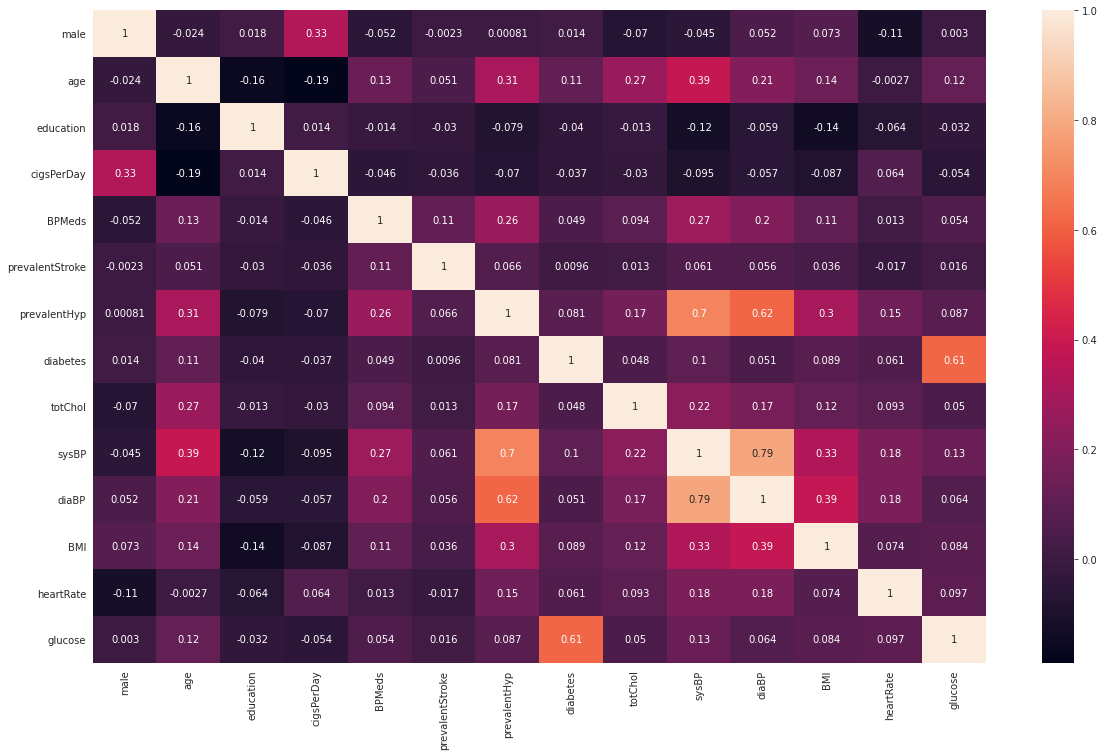

In [84]:
plt.subplots(figsize=(20,12))
sns.heatmap(corr1, annot = True)
plt.show()

In [85]:
# Correlation of the columns of the data set

# Create a dataset new_country with all the features for which we want to find the correlation
# selected_columns = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
# new_country = selected_columns.copy()

# Create a correlation matrix
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf1 = corr.unstack().reset_index()
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace = True)
corrdf1['Correlation'] = round(corrdf1['Correlation'], 2)

In [86]:
pd.set_option("display.max_rows", 100)
corrdf1.sort_values(by = 'Correlation', ascending = False).head(100)

,VAR1,VAR2,Correlation
159,diaBP,sysBP,0.79
141,sysBP,prevalentHyp,0.70
156,diaBP,prevalentHyp,0.62
202,glucose,diabetes,0.61
175,BMI,diaBP,0.39
136,sysBP,age,0.39
45,cigsPerDay,male,0.33
174,BMI,sysBP,0.33
91,prevalentHyp,age,0.31
171,BMI,prevalentHyp,0.30


In [87]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                            GLM   Df Residuals:                     2544
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -979.09
Date:                Sun, 18 Jul 2021   Deviance:                       1958.2
Time:                        00:51:44   Pearson chi2:                 2.47e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9669      0.067    -

In [88]:
# Make a VIF dataframe for all the variables present
df_vif = X_train
vif = pd.DataFrame()
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,sysBP,3.39
10,diaBP,2.93
6,prevalentHyp,1.98
1,age,1.32
11,BMI,1.25
3,cigsPerDay,1.18
13,glucose,1.16
0,male,1.15
7,diabetes,1.14
8,totChol,1.12


In [89]:
X_train = X_train.drop('prevalentStroke',axis = 1)

In [90]:
X_train.head()

,male,age,education,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2520,1.113915,0.293698,2.012031,-0.943778,-0.178479,-0.668266,-0.162709,-0.295981,-0.039876,-0.073365,-0.367734,-0.467530,-0.850851
1068,1.113915,0.411315,-0.949311,0.808732,-0.178479,1.496409,6.145952,-0.182193,0.794381,-0.073365,0.606595,-1.310367,2.853552
2736,1.113915,0.646550,-0.949311,0.184643,-0.178479,1.496409,-0.162709,-0.591828,0.614577,-0.031636,-1.757113,1.218146,-0.657154
2945,-0.897735,0.764167,1.024917,-0.943778,-0.178479,1.496409,-0.162709,1.137741,0.943776,0.928148,0.181877,-0.046111,1.182107
4114,-0.897735,1.822721,2.012031,-0.943778,-0.178479,-0.668266,-0.162709,0.978438,-0.815982,-0.824500,-1.776719,-0.888948,-2.049911


In [91]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                            GLM   Df Residuals:                     2545
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -979.14
Date:                Sun, 18 Jul 2021   Deviance:                       1958.3
Time:                        00:51:44   Pearson chi2:                 2.47e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9669      0.067    -29.323   

In [92]:
# Make a VIF dataframe for all the variables present
df_vif = X_train
vif = pd.DataFrame()
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,sysBP,3.39
9,diaBP,2.93
5,prevalentHyp,1.97
1,age,1.32
10,BMI,1.25
3,cigsPerDay,1.18
12,glucose,1.16
0,male,1.15
6,diabetes,1.14
7,totChol,1.12


In [93]:
X_train = X_train.drop('BMI',axis = 1)
X_train = X_train.drop('heartRate',axis = 1)

In [94]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                            GLM   Df Residuals:                     2547
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -979.48
Date:                Sun, 18 Jul 2021   Deviance:                       1959.0
Time:                        00:51:45   Pearson chi2:                 2.47e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9663      0.067    -29.332   

In [95]:
# Make a VIF dataframe for all the variables present
df_vif = X_train
vif = pd.DataFrame()
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,sysBP,3.38
9,diaBP,2.82
5,prevalentHyp,1.96
1,age,1.32
3,cigsPerDay,1.15
10,glucose,1.15
6,diabetes,1.14
0,male,1.11
7,totChol,1.11
4,BPMeds,1.09


In [96]:
X_train = X_train.drop('diaBP',axis = 1)
X_train = X_train.drop('BPMeds',axis = 1)

In [97]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                            GLM   Df Residuals:                     2549
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -980.08
Date:                Sun, 18 Jul 2021   Deviance:                       1960.2
Time:                        00:51:45   Pearson chi2:                 2.48e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9659      0.067    -29.330   

In [98]:
# Make a VIF dataframe for all the variables present
df_vif = X_train
vif = pd.DataFrame()
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,sysBP,1.98
4,prevalentHyp,1.83
1,age,1.28
3,cigsPerDay,1.14
5,diabetes,1.14
8,glucose,1.14
6,totChol,1.11
0,male,1.09
2,education,1.03


In [99]:
X_train = X_train.drop('totChol',axis = 1)
X_train = X_train.drop('glucose',axis = 1)
X_train = X_train.drop('education',axis = 1)

In [100]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2559
Model:                            GLM   Df Residuals:                     2552
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -982.76
Date:                Sun, 18 Jul 2021   Deviance:                       1965.5
Time:                        00:51:45   Pearson chi2:                 2.49e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9565      0.066    -29.441   

In [101]:
# Make a VIF dataframe for all the variables present
df_vif = X_train
vif = pd.DataFrame()
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,sysBP,1.94
3,prevalentHyp,1.82
1,age,1.20
2,cigsPerDay,1.13
0,male,1.08
4,diabetes,1.01


In [102]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

num_C = {"C": [0.01, 0.02, 0.05, 0.07, 0.1, 1, 10]} #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4) #--> list of values

#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best ROC AUC score:  0.7262051661544697
Best hyperparameters:  {'C': 0.05}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.7s finished


In [103]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010679,0.001936,0.003190,0.000194,0.01,{'C': 0.01},0.680417,0.760107,0.717614,0.729630,0.739617,0.725477,0.026490,7,0.738258,0.720630,0.727210,0.726893,0.725431,0.727684,0.005788
1,0.009860,0.000558,0.002967,0.000148,0.02,{'C': 0.02},0.681636,0.760650,0.720562,0.728501,0.739116,0.726093,0.025987,3,0.739039,0.721321,0.728015,0.727545,0.726103,0.728405,0.005821
2,0.010690,0.000620,0.003092,0.000082,0.05,{'C': 0.05},0.681778,0.760480,0.721598,0.728241,0.738929,0.726205,0.025829,1,0.739479,0.721497,0.728327,0.727829,0.726524,0.728731,0.005894
3,0.011360,0.000463,0.003152,0.000104,0.07,{'C': 0.07},0.681948,0.760311,0.721465,0.728067,0.738678,0.726094,0.025703,2,0.739468,0.721587,0.728204,0.727825,0.726597,0.728736,0.005865
4,0.013381,0.003011,0.004213,0.001548,0.1,{'C': 0.1},0.682119,0.760005,0.721518,0.728096,0.738710,0.726089,0.025565,4,0.739532,0.721622,0.728272,0.727859,0.726564,0.728770,0.005880
5,0.012872,0.001678,0.003514,0.000135,1,{'C': 1},0.681410,0.760650,0.721943,0.727431,0.737990,0.725885,0.025889,5,0.739438,0.721525,0.728306,0.727914,0.726657,0.728768,0.005860
6,0.012002,0.001964,0.003029,0.000570,10,{'C': 10},0.681353,0.760616,0.721943,0.727373,0.737803,0.725818,0.025881,6,0.739423,0.721563,0.728333,0.727881,0.726630,0.728766,0.005848


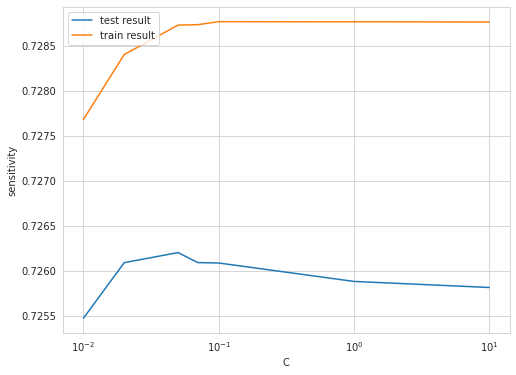

In [104]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [105]:
# Instantiating the model with best C
logreg_imbal_model = LogisticRegression(C=0.05)

# Fitting the model on train dataset
logreg_imbal_model.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
# Predictions on the train set
y_train_pred = logreg_imbal_model.predict(X_train)

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

print(f"Classification Report: \n {classification_report(y_train, y_train_pred)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2169
           1       0.50      0.03      0.05       390

    accuracy                           0.85      2559
   macro avg       0.68      0.51      0.48      2559
weighted avg       0.80      0.85      0.78      2559



In [108]:
# AUC_ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
# Predicted probability
y_train_pred_proba = logreg_imbal_model.predict_proba(X_train)[:,1]

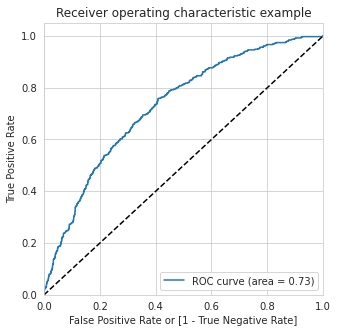

In [110]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [112]:
# Making prediction on the test set
cols = X_train.columns
y_test_pred = logreg_imbal_model.predict(X_test[cols])
print(f"Classification Report: \n {classification_report(y_test, y_test_pred)}")
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
# print(classification_report(y_test, y_test_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       930
           1       0.83      0.06      0.11       167

    accuracy                           0.86      1097
   macro avg       0.84      0.53      0.52      1097
weighted avg       0.85      0.86      0.80      1097

Accuracy Score:  0.8577939835916135


In [113]:
# Predicted probability
y_test_pred_proba = logreg_imbal_model.predict_proba(X_test[cols])[:,1]

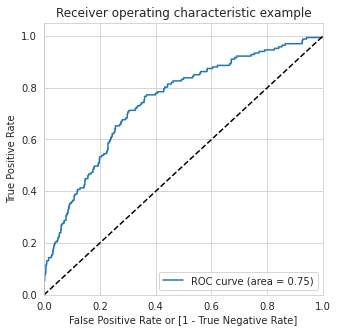

In [114]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [115]:
y = y_train.to_numpy()
print(y)

[0 0 0 ... 1 0 0]


In [116]:
from collections import Counter
from imblearn.over_sampling import ADASYN

X = X_train.iloc[:,:-1].values
y = y_train.to_numpy()

print('original distribution', Counter(y))

ada = ADASYN(sampling_strategy = 'minority', random_state = 100, n_neighbors = 11)
X_train_ada, y_train_ada = ada.fit_resample(X, y)

print('ADASYN distribution', Counter(y_train_ada))

original distribution Counter({0: 2169, 1: 390})
ADASYN distribution Counter({1: 2198, 0: 2169})


In [117]:

num_C = {"C": [0.01, 0.02, 0.05, 0.07, 0.1, 1, 10]} #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4) #--> list of values

#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train_ada, y_train_ada)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best ROC AUC score:  0.6996608876947643
Best hyperparameters:  {'C': 0.01}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished


In [118]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009254,0.001325,0.002398,0.000210,0.01,{'C': 0.01},0.712247,0.697464,0.678438,0.711535,0.698621,0.699661,0.012294,1,0.697288,0.701131,0.705893,0.697562,0.700891,0.700553,0.003117
1,0.009694,0.000431,0.002217,0.000055,0.02,{'C': 0.02},0.712635,0.697537,0.678606,0.711037,0.698353,0.699633,0.012225,2,0.697290,0.701044,0.705852,0.697603,0.700998,0.700557,0.003094
2,0.011261,0.002845,0.002108,0.000051,0.05,{'C': 0.05},0.713111,0.697380,0.678522,0.710753,0.698206,0.699594,0.012314,3,0.697200,0.700983,0.705978,0.697511,0.700920,0.700518,0.003170
3,0.011026,0.001946,0.002213,0.000140,0.07,{'C': 0.07},0.713106,0.697448,0.678432,0.710622,0.698096,0.699541,0.012319,5,0.697191,0.701014,0.705856,0.697519,0.700923,0.700501,0.003129
4,0.010775,0.001736,0.002168,0.000045,0.1,{'C': 0.1},0.713085,0.697464,0.678506,0.710669,0.698033,0.699551,0.012299,4,0.697168,0.700978,0.705825,0.697502,0.700917,0.700478,0.003125
5,0.009804,0.000161,0.002216,0.000050,1,{'C': 1},0.713190,0.697485,0.678506,0.710643,0.697864,0.699537,0.012321,6,0.697106,0.700903,0.705908,0.697549,0.700952,0.700484,0.003157
6,0.009754,0.000226,0.002000,0.000344,10,{'C': 10},0.713185,0.697537,0.678469,0.710590,0.697843,0.699525,0.012322,7,0.697094,0.700907,0.705908,0.697541,0.700944,0.700479,0.003161


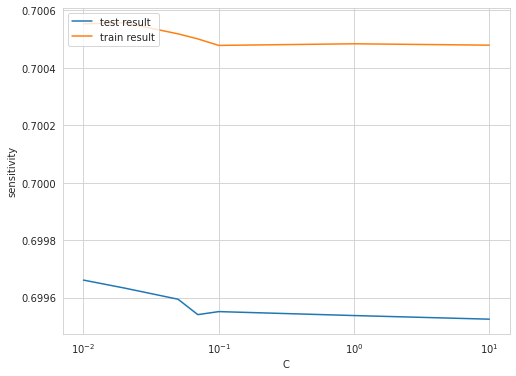

In [119]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [120]:
# Instantiating the model with best C
logreg_imbal_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
logreg_imbal_model.fit(X_train_ada, y_train_ada)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

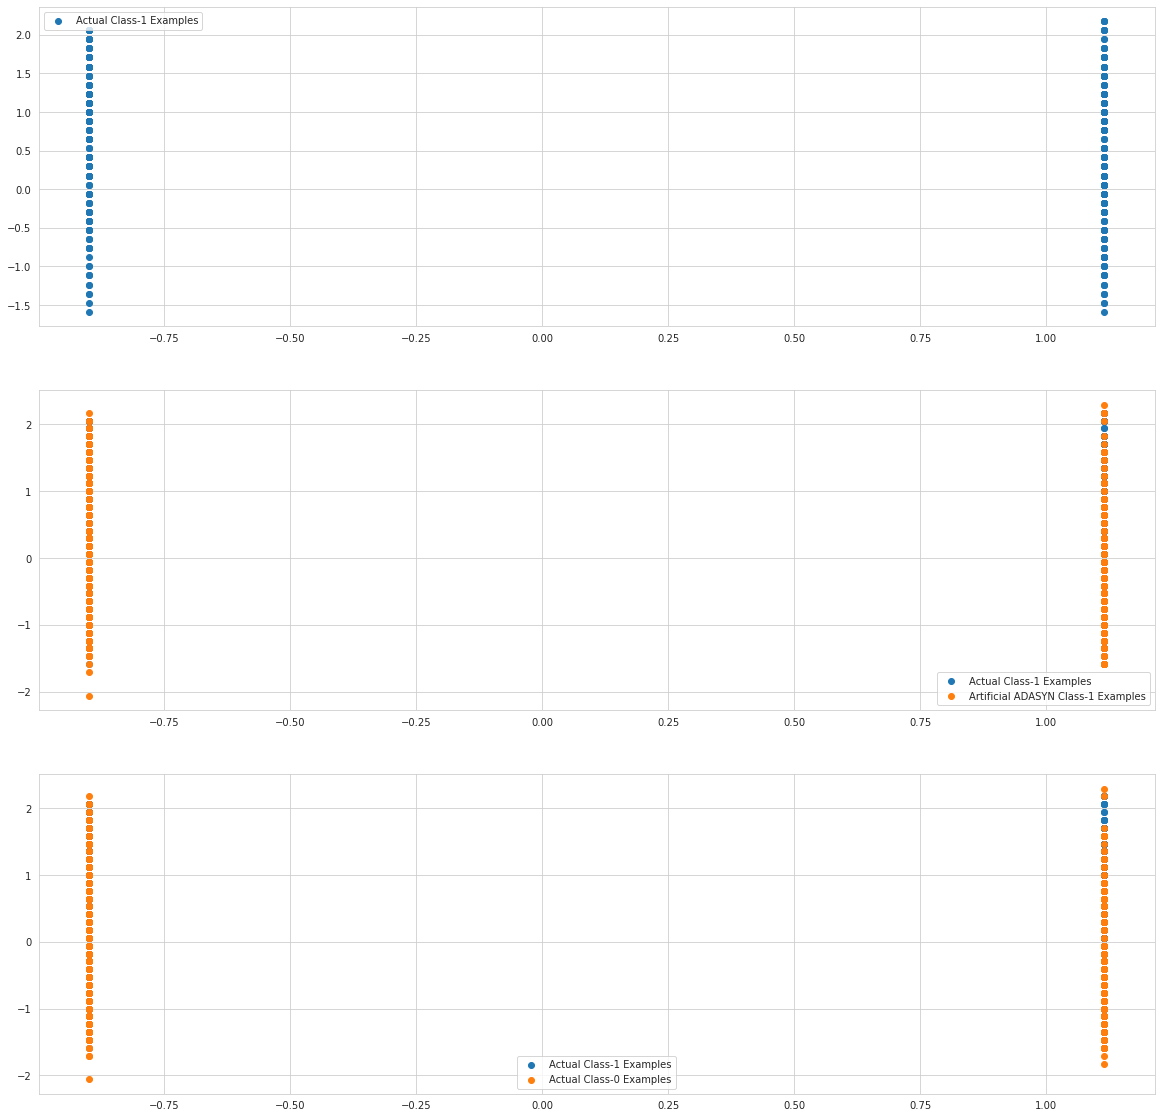

In [121]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
# X_train_adasyn_np = X_train_adasyn[X_train.shape[0]:]
# X_train_adasyn_1 = pd.DataFrame(X_train_adasyn_np, columns = X_train.columns)
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns = X_train[cols].columns)

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
#             label='Artificial ADASYN Class-1 Examples')
plt.scatter(X_train_adasyn.iloc[:X_train_1.shape[0], 0], X_train_adasyn.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [122]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
              'max_depth':[2,4,6,8,10]}         


# specify model
xgb_model = XGBClassifier(n_estimators=500)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'max_depth': [2, 4, 6, 8, 10],
                         'subsample': [0.3, 0.6, 0.9]},
           

In [123]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.555486,0.076160,0.018610,0.000319,0.2,2,0.3,"{'learning_rate': 0.2, 'max_depth': 2, 'subsam...",0.810804,0.916507,0.927328,0.884880,0.052565,30,0.991316,0.934414,0.933893,0.953208,0.026947
1,0.545831,0.005206,0.018265,0.000535,0.2,2,0.6,"{'learning_rate': 0.2, 'max_depth': 2, 'subsam...",0.816492,0.942684,0.955801,0.904992,0.062808,29,0.995266,0.943392,0.942675,0.960444,0.024625
2,0.483340,0.007842,0.018007,0.000298,0.2,2,0.9,"{'learning_rate': 0.2, 'max_depth': 2, 'subsam...",0.817960,0.958026,0.964184,0.913390,0.067526,27,0.996284,0.945592,0.946722,0.962866,0.023635
3,0.806370,0.007378,0.034126,0.000118,0.2,4,0.3,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",0.842112,0.960353,0.970210,0.924225,0.058202,24,0.999871,0.985871,0.986724,0.990822,0.006408
4,0.889874,0.009180,0.033373,0.000359,0.2,4,0.6,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",0.846816,0.970060,0.971239,0.929372,0.058378,10,0.999993,0.992465,0.993304,0.995254,0.003369
5,0.770861,0.007308,0.033172,0.000428,0.2,4,0.9,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",0.836313,0.973178,0.974323,0.927938,0.064790,19,0.999998,0.994950,0.994404,0.996450,0.002518
6,1.113580,0.033732,0.048448,0.000372,0.2,6,0.3,"{'learning_rate': 0.2, 'max_depth': 6, 'subsam...",0.852599,0.962084,0.972609,0.929098,0.054263,13,0.999999,0.997271,0.997811,0.998360,0.001179
7,1.278923,0.016671,0.050171,0.001642,0.2,6,0.6,"{'learning_rate': 0.2, 'max_depth': 6, 'subsam...",0.854870,0.967903,0.972352,0.931708,0.054363,3,1.000000,0.999618,0.999844,0.999821,0.000157
8,1.093037,0.021404,0.048082,0.000738,0.2,6,0.9,"{'learning_rate': 0.2, 'max_depth': 6, 'subsam...",0.846040,0.967443,0.973990,0.929158,0.058834,12,1.000000,0.999799,0.999910,0.999903,0.000082
9,1.335812,0.064586,0.058848,0.001969,0.2,8,0.3,"{'learning_rate': 0.2, 'max_depth': 8, 'subsam...",0.857078,0.963507,0.971640,0.930742,0.052194,7,1.000000,0.998797,0.999200,0.999332,0.000500


In [124]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9321822446279612
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [125]:
model_cv.best_params_

{'learning_rate': 0.6, 'max_depth': 6, 'subsample': 0.6}

In [126]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
# params = {'learning_rate': 0.6,
#           'max_depth': 6, 
#           'n_estimators':500,
#           'subsample':0.6,
#          'objective':'binary:logistic'}

# fit model on training data
# xgb_adasyn_model = XGBClassifier(param_grid = params)
xgb_adasyn_model = XGBClassifier(max_depth = 6, learning_rate = 0.6, n_estimators = 500, subsample = 0.6)
xgb_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [127]:
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2169
           1       1.00      0.99      0.99      2207

    accuracy                           0.99      4376
   macro avg       0.99      0.99      0.99      4376
weighted avg       0.99      0.99      0.99      4376



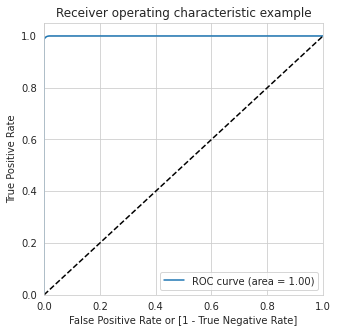

In [128]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [130]:
y_pred = xgb_adasyn_model.predict(X_test[cols])
print(classification_report(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       930
           1       0.25      0.22      0.23       167

    accuracy                           0.78      1097
   macro avg       0.56      0.55      0.55      1097
weighted avg       0.77      0.78      0.78      1097

Accuracy Score:  0.7839562443026435


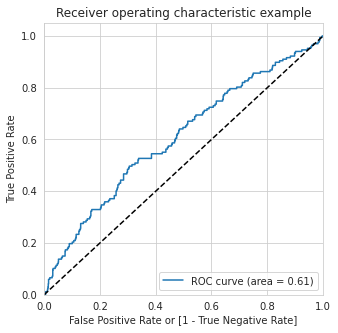

In [131]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test[cols])[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)